In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

C:\Users\panch\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# Replace 'hh.xlsx' with the actual file path of your Excel file
file_path = 'H2.xlsx'

# Read the specific sheet named '18-20' into a DataFrame
data= pd.read_excel(file_path, sheet_name='21-23')

# Display the DataFrame


print(data.shape)

(2063, 15)


In [3]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,list_year,listing_price,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2013.0,145000.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,2003.0,84995.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,1998.0,46500.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,2013.0,86000.0,3
4,"17 Benton Avenue, Birmingham, B11 1UA",B11,4.0,2.0,NaN,FREEHOLD,MID TERRACE PROPERTY,Sept,2023,120000,"139,000 - 209,000",74.0,NaN,NaN,9


In [4]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

bath 0.0175  % missing values
beds 0.0839  % missing values
rep 0.2007  % missing values
area 0.1134  % missing values
list_year 0.5909  % missing values
listing_price 0.5909  % missing values


In [5]:
data.isnull().sum()

Field1                0
area_code             0
bath                 36
beds                173
rep                 414
hold_type             0
property_type         0
sold_month            0
sold_year             0
sold_price            0
estimated_price       0
area                234
list_year          1219
listing_price      1219
type_property         0
dtype: int64

In [6]:
data.dtypes

Field1              object
area_code           object
bath               float64
beds               float64
rep                float64
hold_type           object
property_type       object
sold_month          object
sold_year            int64
sold_price           int64
estimated_price     object
area               float64
list_year          float64
listing_price      float64
type_property        int64
dtype: object

In [7]:
columns_to_drop = ['list_year', 'listing_price']
data = data.drop(columns=columns_to_drop)
print(data.isnull().sum())

Field1               0
area_code            0
bath                36
beds               173
rep                414
hold_type            0
property_type        0
sold_month           0
sold_year            0
sold_price           0
estimated_price      0
area               234
type_property        0
dtype: int64


In [8]:
data=data.dropna()

In [9]:
print(data.isnull().sum())

Field1             0
area_code          0
bath               0
beds               0
rep                0
hold_type          0
property_type      0
sold_month         0
sold_year          0
sold_price         0
estimated_price    0
area               0
type_property      0
dtype: int64


In [10]:
# Fill missing values with appropriate strategies
'''data['rep'].fillna(data['rep'].median(), inplace=True)
data['beds'].fillna(data['beds'].median(), inplace=True)
data['bath'].fillna(data['bath'].median(), inplace=True)'''

"data['rep'].fillna(data['rep'].median(), inplace=True)\ndata['beds'].fillna(data['beds'].median(), inplace=True)\ndata['bath'].fillna(data['bath'].median(), inplace=True)"

In [11]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [12]:
#data['area']= data['area'].interpolate(method = 'linear',axis=0).ffill().bfill()

In [13]:
data['beds'] = data['beds'].astype(float)
data['bath'] = data['bath'].astype(float)
data['area'] = data['area'].astype(float)

In [14]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [15]:
data.isnull().sum()

Field1             0
area_code          0
bath               0
beds               0
rep                0
hold_type          0
property_type      0
sold_month         0
sold_year          0
sold_price         0
estimated_price    0
area               0
type_property      0
dtype: int64

In [16]:
duplicate_rows=data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (1, 13)


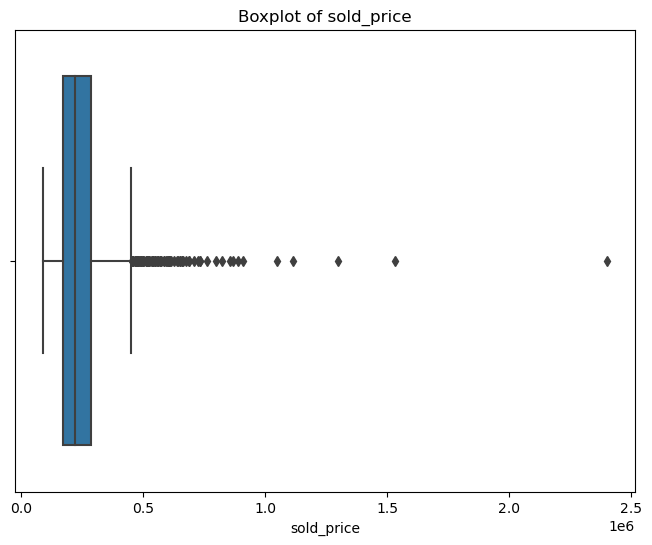

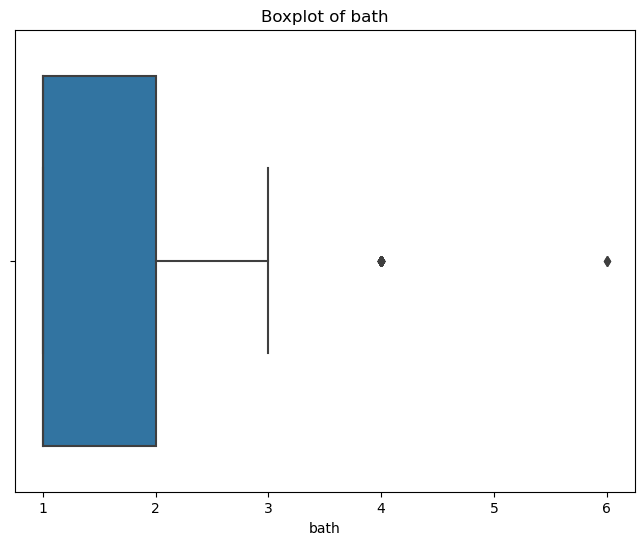

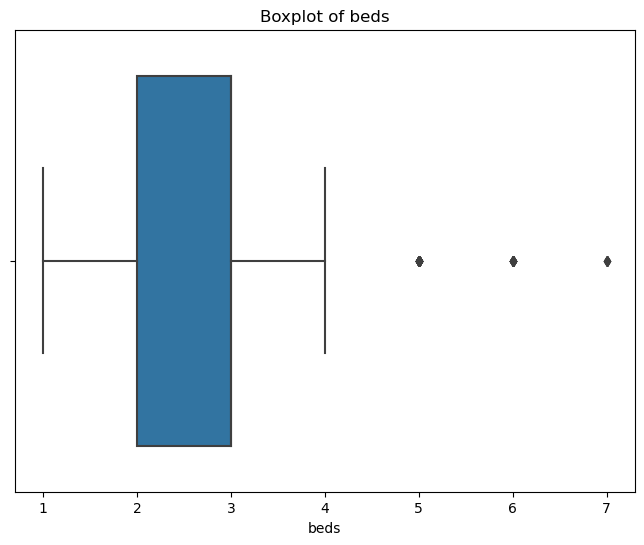

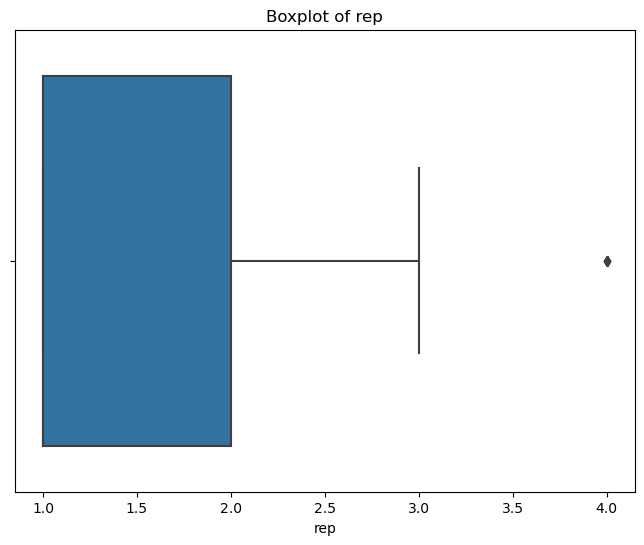

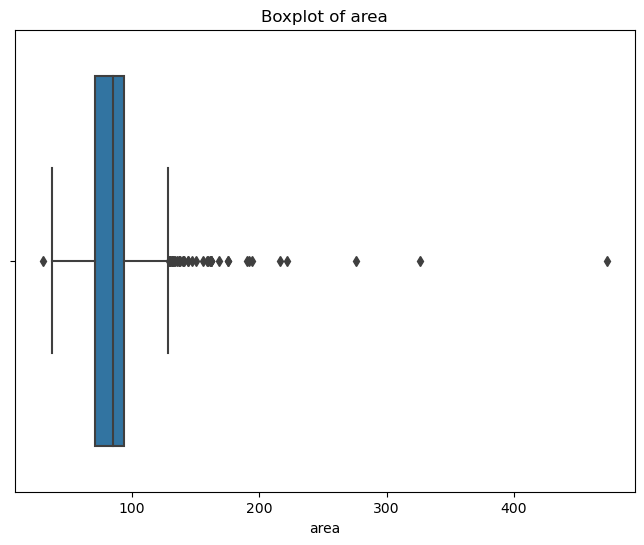

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
def visualize_outliers(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()

# Visualize outliers in the 'sold_price' column
visualize_outliers(data, 'sold_price')
visualize_outliers(data, 'bath')
visualize_outliers(data, 'beds')
visualize_outliers(data, 'rep')
visualize_outliers(data, 'area')


In [18]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

bath                  1.0
beds                  1.0
rep                   1.0
sold_year             1.0
sold_price       112000.0
area                 23.0
type_property         4.0
dtype: float64


In [19]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [20]:
# Function to handle outliers using robust statistics
'''def handle_outliers_robust(data, column_name):
    # Calculate robust statistics
    median = data[column_name].median()
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    
    # Set bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with median
    data[column_name] = np.where(data[column_name] < lower_bound, median, data[column_name])
    data[column_name] = np.where(data[column_name] > upper_bound, median, data[column_name])
    
    return data

# Handle outliers using robust statistics
data = handle_outliers_robust(data, 'sold_price')

# Visualize the data after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['sold_price'])
plt.title('Boxplot of sold_price after Handling Outliers (Robust Statistics)')
plt.show()

# Display the DataFrame after handling outliers
print(data)'''

"def handle_outliers_robust(data, column_name):\n    # Calculate robust statistics\n    median = data[column_name].median()\n    q1 = data[column_name].quantile(0.25)\n    q3 = data[column_name].quantile(0.75)\n    iqr = q3 - q1\n    \n    # Set bounds for outliers\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    \n    # Replace outliers with median\n    data[column_name] = np.where(data[column_name] < lower_bound, median, data[column_name])\n    data[column_name] = np.where(data[column_name] > upper_bound, median, data[column_name])\n    \n    return data\n\n# Handle outliers using robust statistics\ndata = handle_outliers_robust(data, 'sold_price')\n\n# Visualize the data after handling outliers\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=data['sold_price'])\nplt.title('Boxplot of sold_price after Handling Outliers (Robust Statistics)')\nplt.show()\n\n# Display the DataFrame after handling outliers\nprint(data)"

In [21]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [22]:
'''def handle_outliers(data, column_name, method='winsorize', threshold=0.95):
    # Identify outliers using IQR
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Handle outliers based on the chosen method
    if method == 'remove':
        data = data[(df[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    elif method == 'transform_log':
        data[column_name] = np.log1p(data[column_name])
    elif method == 'winsorize':
        data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])
        data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])
    else:
        raise ValueError("Invalid method. Choose 'remove', 'transform_log', or 'winsorize'.")
    
    return data

# Choose a method to handle outliers
data = handle_outliers(data, 'sold_price', method='transform_log')

# Display the DataFrame after handling outliers
print(data)'''

'def handle_outliers(data, column_name, method=\'winsorize\', threshold=0.95):\n    # Identify outliers using IQR\n    q1 = data[column_name].quantile(0.25)\n    q3 = data[column_name].quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    \n    # Handle outliers based on the chosen method\n    if method == \'remove\':\n        data = data[(df[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]\n    elif method == \'transform_log\':\n        data[column_name] = np.log1p(data[column_name])\n    elif method == \'winsorize\':\n        data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])\n        data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])\n    else:\n        raise ValueError("Invalid method. Choose \'remove\', \'transform_log\', or \'winsorize\'.")\n    \n    return data\n\n# Choose a method to handle outliers\ndata = handle_outliers

In [23]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

bath                  1.0
beds                  1.0
rep                   1.0
sold_year             1.0
sold_price       112000.0
area                 23.0
type_property         4.0
dtype: float64


In [24]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,bath,beds,rep,sold_year,sold_price,area,type_property
0,1.0,3.0,1.0,2023,245000,108.0,2
1,1.0,3.0,1.0,2023,181500,92.0,4
2,1.0,3.0,2.0,2023,182000,97.0,2
3,1.0,3.0,1.0,2023,170000,82.0,3
5,1.0,3.0,2.0,2023,292000,94.0,2


In [25]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

In [26]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [27]:
discrete_feature

['bath', 'beds', 'rep', 'sold_year', 'type_property']

In [28]:
data[discrete_feature].head()

,bath,beds,rep,sold_year,type_property
0,1.0,3.0,1.0,2023,2
1,1.0,3.0,1.0,2023,4
2,1.0,3.0,2.0,2023,2
3,1.0,3.0,1.0,2023,3
5,1.0,3.0,2.0,2023,2


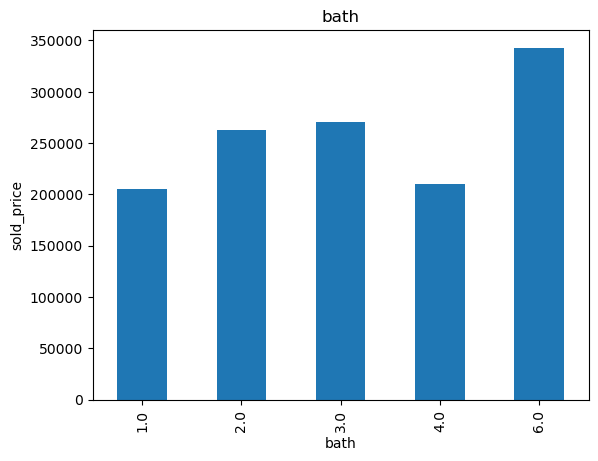

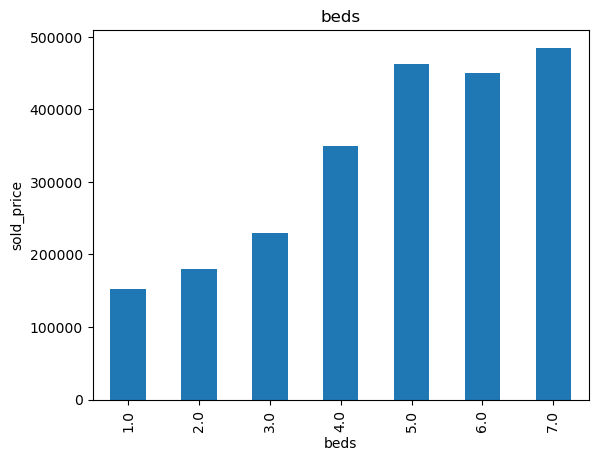

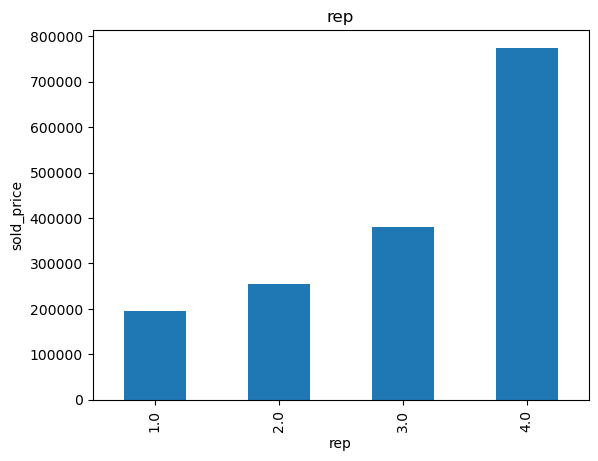

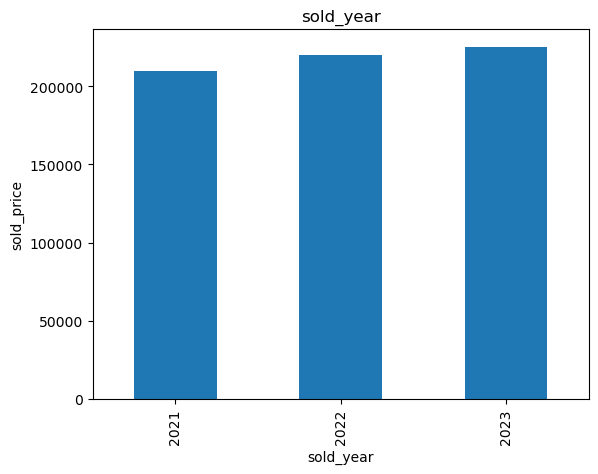

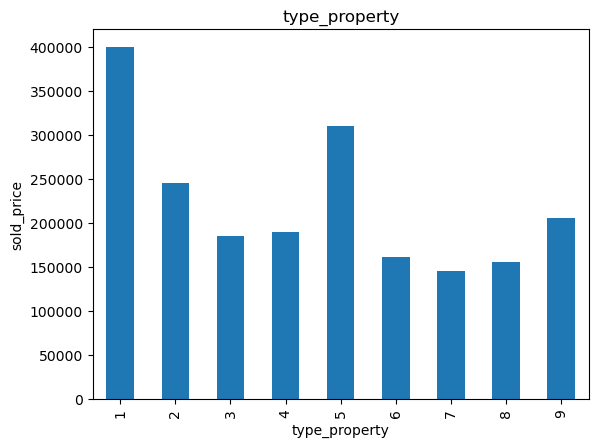

In [29]:
for feature in discrete_feature:
    data=data.copy()
    data.groupby(feature)['sold_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sold_price')
    plt.title(feature)
    plt.show()

In [30]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [31]:
# Create a dictionary mapping each postcode to its adjacent area
postcode_to_area = {
    'B25': 'Yardley',
    'B23': 'Erdington',
    'B17': 'Edgbaston',
    'B67': 'Smethwick',
    'B18': 'Winson Green',
    'B31': 'Northfield',
    'B14': 'Kings Heath',
    'B43': 'Great Barr',
    'B11': 'Sparkhill',
    'B24': 'Erdington',
    'B29': 'Selly Oak',
    'B44': 'Perry Barr',
    'B5': 'Digbeth',
    'B37': 'Chelmsley Wood',
    'B30': 'Bournville',
    'B38': 'Kings Norton',
    'B20': 'Handsworth Wood',
    'B28': 'Hall Green',
    'B90': 'Solihull',
    'B1': 'City Centre',
    'B32': 'Woodgate',
    'B73': 'New Oscott',
    'B8': 'Alum Rock',
    'B7': 'Nechells',
    'B33': 'Kitts Green',
    'B13': 'Moseley',
    'B45': 'Rendal',
    'B34': 'Shard End',
    'B21': 'Handsworth Wood',
    'B6': 'Aston',
    'B71': 'West Bromwich',
    'B47': 'Hollywood',
    'B12': 'Balsall Heath',
    'B26': 'Yardley',
    'B19': 'Lozells',
    'B42': 'Perry Barr',
    'B27': 'Acocks Green',
    'B15': 'Edgbaston',
    'B16': 'Edgbaston',
    'B92': 'Solihull',
    'B36': 'Castle Bromwich',
    'B35': 'Castle Vale',
    'B9': 'Bordesley Green',
    'B72': 'Sutton Coldfield',
    'B10': 'Small Heath',
    'B2': 'City Centre',
    'B76': 'Sutton Coldfield',
    'B66': 'Smethwick',
    'B4': 'City Centre',
    'B48': 'Alvechurch',
    'B3': 'City Centre',
    'B68': 'Langley',
    'B46': 'Coleshill',
    'B74': 'Four Oaks'
}

# Create a new column 'Adjacent_Area' based on the mapping
data['Adjacent_Area'] = data['area_code'].map(postcode_to_area)

# Display the updated DataFrame
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property,Adjacent_Area
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2,Great Barr
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4,Northfield
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2,Handsworth Wood
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3,Castle Bromwich
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2,Handsworth Wood


In [32]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with 'sold_month' and 'sold_year' columns

# Convert 'sold_month' and 'sold_year' to datetime
data['sold_date'] = pd.to_datetime(data['sold_year'].astype(str) + '-' + data['sold_month'].astype(str) + '-1')

# Extract additional features and format 'quarter' column
data['quarter'] = data['sold_date'].dt.to_period("Q").astype(str)

# Modify the 'quarter' column to only consist of 'q1', 'q2', 'q3', 'q4'
data['quarter'] = 'q' + data['quarter'].str[-1]

# Convert 'quarter' to categorical type
data['quarter'] = data['quarter'].astype('category')

# Convert categorical to numerical using label encoding
data['quarter'] = data['quarter'].cat.codes

# Drop the 'sold_date' column
data = data.drop('sold_date', axis=1)

# Display the updated DataFrame
print(data.head())


                                     Field1 area_code  bath  beds  rep  \
0   35 Stonehurst Road, Birmingham, B43 7RA       B43   1.0   3.0  1.0   
1         33 Exe Croft, Birmingham, B31 3LB       B31   1.0   3.0  1.0   
2  24 Camplin Crescent, Birmingham, B20 1LS       B20   1.0   3.0  2.0   
3      74 Triumph Walk, Birmingham, B36 9NU       B36   1.0   3.0  1.0   
5   71 Denewood Avenue, Birmingham, B20 2AF       B20   1.0   3.0  2.0   

  hold_type           property_type sold_month  sold_year  sold_price  \
0  FREEHOLD  SEMI-DETACHED PROPERTY       Sept       2023      245000   
1  FREEHOLD        TERRACE PROPERTY       Sept       2023      181500   
2  FREEHOLD  SEMI-DETACHED PROPERTY       Sept       2023      182000   
3  FREEHOLD    END TERRACE PROPERTY       Sept       2023      170000   
5  FREEHOLD  SEMI-DETACHED PROPERTY       Sept       2023      292000   

     estimated_price   area  type_property    Adjacent_Area  quarter  
0  255,000 - 282,000  108.0              2   

In [33]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property,Adjacent_Area,quarter
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2,Great Barr,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4,Northfield,2
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2,Handsworth Wood,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3,Castle Bromwich,2
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2,Handsworth Wood,2


In [34]:
columns_to_drop = ["Field1", "area_code","estimated_price","property_type"]
data = data.drop(columns=columns_to_drop)

In [35]:
#Select the categorical columns to encode
categorical_columns = ['hold_type','Adjacent_Area','sold_month','sold_year']

#Perform one-hot encoding on the categorical columns
data = pd.get_dummies(data, columns=categorical_columns)

In [36]:
data.head()

,bath,beds,rep,sold_price,area,type_property,quarter,hold_type_FREEHOLD,hold_type_LEASEHOLD,Adjacent_Area_Acocks Green,Adjacent_Area_Alvechurch,Adjacent_Area_Balsall Heath,Adjacent_Area_Bournville,Adjacent_Area_Castle Bromwich,Adjacent_Area_Castle Vale,Adjacent_Area_Chelmsley Wood,Adjacent_Area_Coleshill,Adjacent_Area_Edgbaston,Adjacent_Area_Erdington,Adjacent_Area_Great Barr,Adjacent_Area_Hall Green,Adjacent_Area_Handsworth Wood,Adjacent_Area_Hollywood,Adjacent_Area_Kings Heath,Adjacent_Area_Kings Norton,Adjacent_Area_Kitts Green,Adjacent_Area_Langley,Adjacent_Area_Lozells,Adjacent_Area_Moseley,Adjacent_Area_New Oscott,Adjacent_Area_Northfield,Adjacent_Area_Perry Barr,Adjacent_Area_Rendal,Adjacent_Area_Selly Oak,Adjacent_Area_Shard End,Adjacent_Area_Small Heath,Adjacent_Area_Smethwick,Adjacent_Area_Solihull,Adjacent_Area_Sparkhill,Adjacent_Area_Sutton Coldfield,Adjacent_Area_West Bromwich,Adjacent_Area_Winson Green,Adjacent_Area_Woodgate,Adjacent_Area_Yardley,sold_month_ Apr,sold_month_ Aug,sold_month_ Dec,sold_month_ Feb,sold_month_ Jan,sold_month_ Jul,sold_month_ Jun,sold_month_ Mar,sold_month_ May,sold_month_ Nov,sold_month_ Oct,sold_month_Sept,sold_year_2021,sold_year_2022,sold_year_2023
0,1.0,3.0,1.0,245000,108.0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1.0,3.0,1.0,181500,92.0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1.0,3.0,2.0,182000,97.0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,3.0,1.0,170000,82.0,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,1.0,3.0,2.0,292000,94.0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,data['sold_price'],test_size=0.1,random_state=0)

In [38]:
X_train.shape, X_test.shape

((1352, 59), (151, 59))

In [39]:
# To split the data.
x = data.drop("sold_price", axis=1)
y = data['sold_price']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [40]:
#To check the dimension of splitted data.
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1052, 58)
(451, 58)
(1052,)
(451,)


In [64]:
xtrain.to_excel("xtrain.xlsx", index=False)
ytrain.to_excel("ytrain.xlsx", index=False)
xtest.to_excel("xtest.xlsx", index=False)
ytest.to_excel("ytest.xlsx", index=False)

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
model = LinearRegression()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 60427.57591245312
Mean Squared Error (MSE): 7189688152.862475
Root Mean Squared Error (RMSE): 84792.02882855484
R-squared (R2) Score: 0.5845187686835509


In [43]:
model = Ridge()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 59876.12185534831
Mean Squared Error (MSE): 7149102601.704829
Root Mean Squared Error (RMSE): 84552.36603256487
R-squared (R2) Score: 0.5868641464537845


In [44]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 54255.20898004434
Mean Squared Error (MSE): 6459032125.821377
Root Mean Squared Error (RMSE): 80368.10390833777
R-squared (R2) Score: 0.6267422781500855


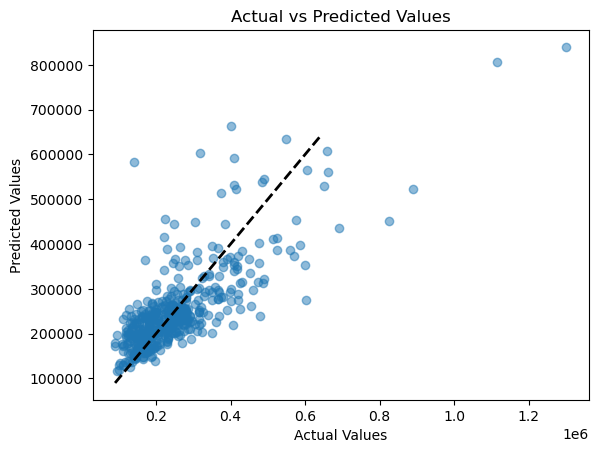

In [89]:
plt.scatter(ytest, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [45]:
model = SVR()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 85353.83258051857
Mean Squared Error (MSE): 18672786240.315796
Root Mean Squared Error (RMSE): 136648.4037239945
R-squared (R2) Score: -0.07907214531223272


In [46]:

model = GradientBoostingRegressor()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 55040.243363479305
Mean Squared Error (MSE): 6855005193.209802
Root Mean Squared Error (RMSE): 82794.95874272661
R-squared (R2) Score: 0.6038595919877945


In [47]:

model = KNeighborsRegressor()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 73970.93747228381
Mean Squared Error (MSE): 11998258744.052683
Root Mean Squared Error (RMSE): 109536.56350302708
R-squared (R2) Score: 0.30663872887899446


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Standardize the features
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Create a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(xtrain_scaled, ytrain, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(xtest_scaled).flatten()

# Evaluate the model performance
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

# Display the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')





Epoch 1/50

27/27 [==============================] - 1s 14ms/step - loss: 81607598080.0000 - val_loss: 84632682496.0000
Epoch 2/50
27/27 [==============================] - 0s 6ms/step - loss: 81605664768.0000 - val_loss: 84629995520.0000
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 81601839104.0000 - val_loss: 84624965632.0000
Epoch 4/50
27/27 [==============================] - 0s 5ms/step - loss: 81594974208.0000 - val_loss: 84616265728.0000
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 81583333376.0000 - val_loss: 84602642432.0000
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 81565614080.0000 - val_loss: 84582023168.0000
Epoch 7/50
27/27 [==============================] - 0s 5ms/step - loss: 81539203072.0000 - val_loss: 84553261056.0000
Epoch 8/50
27/27 [==============================] - 0s 5ms/step - loss: 81502855168.0000 - val_loss: 84514856960.0000
Epoch 9/50
27/27 [==============================] -

In [49]:
from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
# Train the model
model.fit(xtrain, ytrain)
# Make predictions on the test set
y_pred = model.predict(xtest)
# Evaluate the model performance
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
# Display the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 66925.65410199556
Mean Squared Error (MSE): 11038022778.013304
Root Mean Squared Error (RMSE): 105061.99492686831
R-squared (R2) Score: 0.36212931665442405


In [50]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# Standardize the features (important for Lasso Regression)
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Create a Lasso Regression model
alpha_value = 0.01  # You can adjust this parameter based on your data
model = Lasso(alpha=alpha_value, random_state=42)

# Train the model
model.fit(xtrain_scaled, ytrain)

# Make predictions on the test set
y_pred = model.predict(xtest_scaled)

# Evaluate the model performance
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

# Display the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 60427.554168086615
Mean Squared Error (MSE): 7189686467.533955
Root Mean Squared Error (RMSE): 84792.01889054154
R-squared (R2) Score: 0.5845188660761436


C:\Users\panch\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+11, tolerance: 2.079e+09
  model = cd_fast.enet_coordinate_descent(


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create an XGBoost Regression model
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = model.predict(xtest)

# Evaluate the model performance
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

# Display the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error (MAE): 57480.212652439026
Mean Squared Error (MSE): 7365627299.810906
Root Mean Squared Error (RMSE): 85823.23286739382
R-squared (R2) Score: 0.5743515108196899


In [52]:
# Step 6: Feature Importance
model.fit(xtrain, ytrain)
importance = model.feature_importances_
feature_names = x.columns

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importances)

Feature Importances:
                           Feature  Importance
57                  sold_year_2023    0.158234
16         Adjacent_Area_Edgbaston    0.076731
1                             beds    0.067955
35         Adjacent_Area_Smethwick    0.061543
47                 sold_month_ Jan    0.053833
27           Adjacent_Area_Moseley    0.049587
14    Adjacent_Area_Chelmsley Wood    0.044686
4                    type_property    0.038262
13       Adjacent_Area_Castle Vale    0.028883
38  Adjacent_Area_Sutton Coldfield    0.025758
11        Adjacent_Area_Bournville    0.025151
5                          quarter    0.023661
22       Adjacent_Area_Kings Heath    0.023458
20   Adjacent_Area_Handsworth Wood    0.018535
17         Adjacent_Area_Erdington    0.018425
36          Adjacent_Area_Solihull    0.018083
50                 sold_month_ Mar    0.017789
21         Adjacent_Area_Hollywood    0.017477
2                              rep    0.015639
28        Adjacent_Area_New Oscott    0

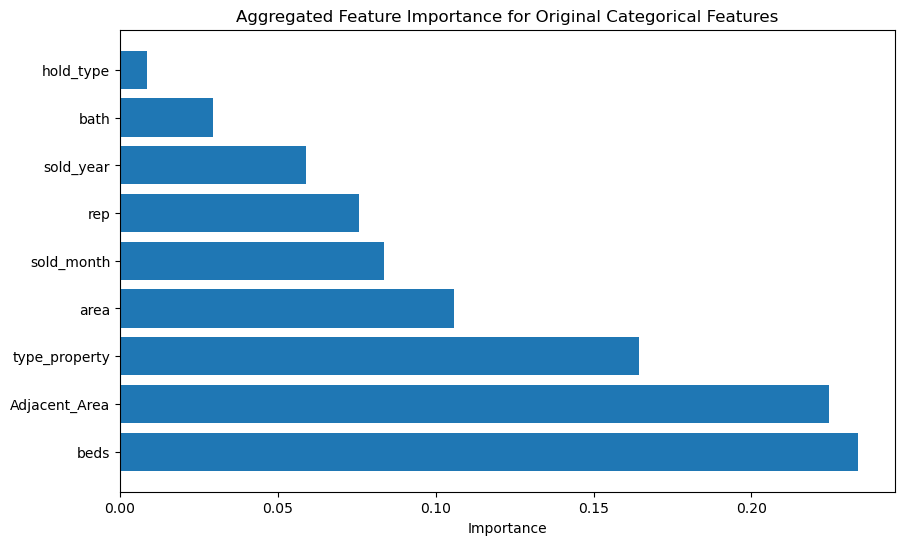

In [53]:
model = RandomForestRegressor()
model.fit(x, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# List of original categorical features
original_categorical_features = ['hold_type', 'type_property', 'sold_month', 'sold_year', 'Adjacent_Area','bath','beds','rep','area']

# Aggregate feature importances for original categorical features
original_categorical_importances = []
for original_categorical_feature in original_categorical_features:
    dummy_columns = [col for col in x.columns if original_categorical_feature in col]
    aggregate_importance = feature_importance_df.loc[feature_importance_df['Feature'].isin(dummy_columns), 'Importance'].sum()
    original_categorical_importances.append({'Feature': original_categorical_feature, 'Importance': aggregate_importance})

# Create a DataFrame for aggregated feature importances
aggregated_importance_df = pd.DataFrame(original_categorical_importances)

# Sort the DataFrame by importance in descending order
aggregated_importance_df = aggregated_importance_df.sort_values(by='Importance', ascending=False)

# Plot the aggregated feature importance
plt.figure(figsize=(10, 6))
plt.barh(aggregated_importance_df['Feature'], aggregated_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Aggregated Feature Importance for Original Categorical Features')
plt.show()

In [54]:
data.head()

,bath,beds,rep,sold_price,area,type_property,quarter,hold_type_FREEHOLD,hold_type_LEASEHOLD,Adjacent_Area_Acocks Green,Adjacent_Area_Alvechurch,Adjacent_Area_Balsall Heath,Adjacent_Area_Bournville,Adjacent_Area_Castle Bromwich,Adjacent_Area_Castle Vale,Adjacent_Area_Chelmsley Wood,Adjacent_Area_Coleshill,Adjacent_Area_Edgbaston,Adjacent_Area_Erdington,Adjacent_Area_Great Barr,Adjacent_Area_Hall Green,Adjacent_Area_Handsworth Wood,Adjacent_Area_Hollywood,Adjacent_Area_Kings Heath,Adjacent_Area_Kings Norton,Adjacent_Area_Kitts Green,Adjacent_Area_Langley,Adjacent_Area_Lozells,Adjacent_Area_Moseley,Adjacent_Area_New Oscott,Adjacent_Area_Northfield,Adjacent_Area_Perry Barr,Adjacent_Area_Rendal,Adjacent_Area_Selly Oak,Adjacent_Area_Shard End,Adjacent_Area_Small Heath,Adjacent_Area_Smethwick,Adjacent_Area_Solihull,Adjacent_Area_Sparkhill,Adjacent_Area_Sutton Coldfield,Adjacent_Area_West Bromwich,Adjacent_Area_Winson Green,Adjacent_Area_Woodgate,Adjacent_Area_Yardley,sold_month_ Apr,sold_month_ Aug,sold_month_ Dec,sold_month_ Feb,sold_month_ Jan,sold_month_ Jul,sold_month_ Jun,sold_month_ Mar,sold_month_ May,sold_month_ Nov,sold_month_ Oct,sold_month_Sept,sold_year_2021,sold_year_2022,sold_year_2023
0,1.0,3.0,1.0,245000,108.0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1.0,3.0,1.0,181500,92.0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,1.0,3.0,2.0,182000,97.0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,3.0,1.0,170000,82.0,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,1.0,3.0,2.0,292000,94.0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [55]:
new_data = pd.DataFrame({
    'bath': [1],  # Replace with the new company's sector
    'area': [108],  # Replace with the new company's number of founders
    'beds': [3],  # Replace with the new company's number of funding rounds
    'rep': [1],  # Replace with the new company's number of investors
    'hold_type': ['FREEHOLD'],  # Replace with the new company's lifetime in years
    'property_type': ['SEMI-DETACHED PROPERTY']  # Replace with the new company's number_of_employees
})


In [56]:
# Preprocess new data similar to training data
new_data_encoded = pd.get_dummies(new_data, columns=['hold_type','property_type'])
new_data_encoded = new_data_encoded.reindex(columns=x.columns, fill_value=0)


In [57]:
predictions = model.predict(new_data_encoded)
print("Predicted Price:", predictions)

Predicted Price: [276590.]


In [58]:
new_data_encoded = pd.get_dummies(new_data, columns=['hold_type','property_type'])
new_data_encoded = new_data_encoded.reindex(columns=x.columns, fill_value=0)


In [59]:
predictions = model.predict(new_data_encoded)

In [60]:
predictions

array([276590.])

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Define the scoring metric (you can choose other metrics as well)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(xtrain, ytrain)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = best_rf_model.predict(xtest)

# Evaluate the performance of the model
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Mean Absolute Error (MAE): 54460.720485188824
Mean Squared Error (MSE): 6499653537.260638
Root Mean Squared Error (RMSE): 80620.42878365655
R-squared (R2) Score: 0.6243948280682796


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute Error (MAE): 53961.849159821395
Mean Squared Error (MSE): 6512912213.271762
Root Mean Squared Error (RMSE): 80702.615901046
R-squared (R2) Score: 0.6236286291848782


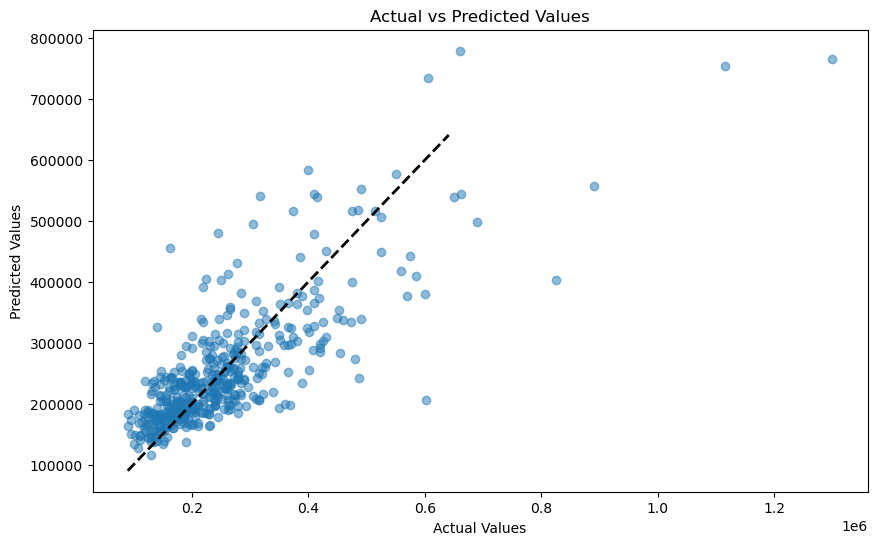

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Define the scoring metric (you can choose other metrics as well)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(xtrain, ytrain)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = best_rf_model.predict(xtest)

# Evaluate the performance of the model
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the ensemble
    'learning_rate': [0.05, 0.1, 0.15],  # Step size for each tree
    'max_depth': [3, 4, 5, 6],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
}
# Example using RandomizedSearchCV (adjust for GridSearchCV if preferred)
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=param_grid,
    n_iter=20,  # Number of random hyperparameter combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Evaluation metric
    verbose=2,  # Print progress
)
random_search.fit(xtrain, ytrain)
best_params = random_search.best_params_
best_model = random_search.best_estimator_
y_pred = best_model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40

[CV] END learning_rate=0.15, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, 

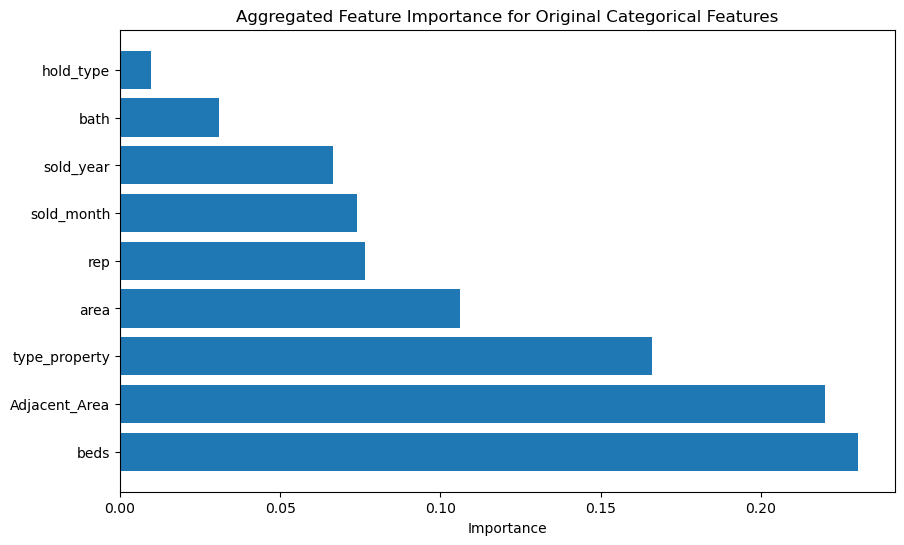

In [63]:
model = RandomForestRegressor()
model.fit(x, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# List of original categorical features
original_categorical_features = ['hold_type', 'type_property', 'sold_month', 'sold_year', 'Adjacent_Area','bath','beds','rep','area']

# Aggregate feature importances for original categorical features
original_categorical_importances = []
for original_categorical_feature in original_categorical_features:
    dummy_columns = [col for col in x.columns if original_categorical_feature in col]
    aggregate_importance = feature_importance_df.loc[feature_importance_df['Feature'].isin(dummy_columns), 'Importance'].sum()
    original_categorical_importances.append({'Feature': original_categorical_feature, 'Importance': aggregate_importance})

# Create a DataFrame for aggregated feature importances
aggregated_importance_df = pd.DataFrame(original_categorical_importances)

# Sort the DataFrame by importance in descending order
aggregated_importance_df = aggregated_importance_df.sort_values(by='Importance', ascending=False)

# Plot the aggregated feature importance
plt.figure(figsize=(10, 6))
plt.barh(aggregated_importance_df['Feature'], aggregated_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Aggregated Feature Importance for Original Categorical Features')
plt.show()

In [101]:
new_data = pd.DataFrame({
    'bath': [2,1,3,2,3,1,1,1,2,1],  
    'area': [194,108,162,106,222,92,115,105,121,64],  
    'beds': [4,3,3,5,5,4,3,2,4,1],  
    'rep': [1,1,2,1,2,1,2,1,2,1],    
    'type_property': [1,2,1,1,1,4,2,6,9,6],
    'hold_type':['FREEHOLD','FREEHOLD','FREEHOLD','FREEHOLD','FREEHOLD','LEASEHOLD','LEASEHOLD','LEASEHOLD','LEASEHOLD','LEASEHOLD'],
    'Adjacent_Area':['Sutton Coldfield','Great Barr','Kings Norton','Sutton Coldfield','Kings Norton','Digbeth','Kings Norton','Edgbaston','Erdington','Edgbaston']
    
})

# Preprocess new data similar to training data
new_data_encoded = pd.get_dummies(new_data, columns=['hold_type','Adjacent_Area'])
new_data_encoded = new_data_encoded.reindex(columns=x.columns, fill_value=0)

predictions = model.predict(new_data_encoded)
print("Predicted Price:", predictions)
#actual 550000,245000,395000,650000,662500,224000,280000,295000,205000,135000


Predicted Price: [552534.5        279908.66666667 419554.5        553114.5
 570849.5        214955.         264741.         326605.
 245245.         126980.        ]


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming 'data' is your original dataset with actual prices

# Split the data into features (X) and target variable (y)
X = data.drop('sold_price', axis=1)
y = data['sold_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model on the training set
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Use the trained model to predict prices on the testing set
predictions = model.predict(X_test)

# Evaluate the model performance using mean absolute error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error on Test Set:", mae)

# Simulate predicting prices for a dataset without actual prices
# This could be your 'new_data' without the 'price' column
simulated_predictions = model.predict(new_data_encoded)
print("Simulated Predicted Prices for the new_data:")
print(simulated_predictions)


Mean Absolute Error on Test Set: 54040.8196124031
Simulated Predicted Prices for the new_data:
[531225.  296232.5 453645.  581975.  584465.  204210.6 261581.  246876.
 236095.  125620. ]
